In [462]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_validate, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [463]:
df = pd.read_csv('/Users/lilygoldwasser/Documents/metis/Regression/csv/clean_df.csv',index_col=0)

In [464]:
df.Rating.value_counts()

PG13        507
R           279
PG          239
G            18
Approved      1
Name: Rating, dtype: int64

In [465]:
df = df.drop(columns='Title')

In [466]:
df = df.drop(columns='Distributor')

In [467]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Rating', 'Runtime', 'Markets', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Musical', 'Mystery',
       'Romance', 'SciFi', 'Sport', 'Thriller', 'War', 'Western',
       'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.'],
      dtype='object')

In [468]:
df = df[df.Rating != 'Approved']
abc = df["Rating"]
xyz = pd.get_dummies(abc)
xyz

,G,PG,PG13,R
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1182,0,1,0,0
1183,0,0,0,1
1184,0,0,0,1
1185,0,0,1,0


In [469]:
df.head(4)

,index,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,...,Sport,Thriller,War,Western,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
0,0,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,77025481.0,237000000.0,...,0,0,0,0,0,0,1,0,0,0
1,2,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,357115007.0,356000000.0,...,0,0,0,0,0,0,0,0,1,0
2,4,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,28638131.0,200000000.0,...,0,0,0,0,1,0,0,0,0,0
3,6,4,2069521700,936662225.0,45.3,1132859475,54.7,2015,247966675.0,245000000.0,...,0,0,0,0,0,0,0,0,1,0


In [470]:
#combine ratings dummy w/ df
df = pd.concat([df, xyz], axis=1)
df.head()

,index,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,...,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG13,R
0,0,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,77025481.0,2.370000e+08,...,0,0,1,0,0,0,0,0,1,0
1,2,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,357115007.0,3.560000e+08,...,0,0,0,0,1,0,0,0,1,0
2,4,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,28638131.0,2.000000e+08,...,1,0,0,0,0,0,0,0,1,0
3,6,4,2069521700,936662225.0,45.3,1132859475,54.7,2015,247966675.0,2.450000e+08,...,0,0,0,0,1,0,0,0,1,0
4,8,5,2048359754,678815482.0,33.1,1369544272,66.9,2018,257698183.0,9.034442e+07,...,0,0,0,0,1,0,0,0,1,0


In [471]:
df = df.drop(columns='Rating')

In [472]:
df.corr()

,index,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,...,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG13,R
index,1.000000,0.995443,-0.825153,-0.709189,0.253546,-0.791537,-0.200186,-0.157639,-0.624313,-0.469001,...,0.025600,0.018828,-0.051628,0.028071,-0.139208,-0.027041,-0.040693,-0.094632,-0.130786,0.201162
Rank,0.995443,1.000000,-0.776265,-0.666112,0.253501,-0.744689,-0.199397,-0.146671,-0.580728,-0.449903,...,0.020570,0.021204,-0.060826,0.027068,-0.124886,-0.028133,-0.042975,-0.095057,-0.121135,0.194917
World_Gross,-0.825153,-0.776265,1.000000,0.862255,-0.204766,0.960771,0.164602,0.184788,0.773571,0.504048,...,-0.036185,-0.017775,0.012037,-0.027487,0.198783,0.008814,0.020805,0.067053,0.160834,-0.190340
Domestic_Gross,-0.709189,-0.666112,0.862255,1.000000,0.209187,0.697515,-0.218643,0.019317,0.824411,0.376034,...,-0.003744,-0.020407,-0.000059,-0.021500,0.229201,0.006541,0.022717,0.078349,0.153676,-0.168660
Domestic_Percentage,0.253546,0.253501,-0.204766,0.209187,1.000000,-0.401157,-0.887381,-0.346924,0.052391,-0.284305,...,0.092498,0.007106,-0.032481,0.028867,0.037703,0.000107,-0.003734,-0.000551,-0.012821,0.058392
Foreign_Gross,-0.791537,-0.744689,0.960771,0.697515,-0.401157,1.000000,0.384567,0.265944,0.664130,0.517699,...,-0.054072,-0.019405,0.011626,-0.033359,0.155528,0.004263,0.015772,0.048148,0.136107,-0.188069
Foreign_Percentage,-0.200186,-0.199397,0.164602,-0.218643,-0.887381,0.384567,1.000000,0.354669,-0.069709,0.251907,...,-0.112734,-0.034555,0.008262,-0.050019,-0.060503,-0.030930,-0.006749,-0.035598,-0.050668,-0.095233
Year,-0.157639,-0.146671,0.184788,0.019317,-0.346924,0.265944,0.354669,1.000000,0.248712,0.239639,...,-0.088571,0.075656,-0.004063,-0.015412,0.005441,0.024136,-0.037407,0.067944,0.145028,-0.050424
Domestic_Opening,-0.624313,-0.580728,0.773571,0.824411,0.052391,0.664130,-0.069709,0.248712,1.000000,0.502027,...,-0.036171,0.003610,-0.015723,0.000530,0.209162,0.038408,0.019118,0.013918,0.251688,-0.162022
Budget,-0.469001,-0.449903,0.504048,0.376034,-0.284305,0.517699,0.251907,0.239639,0.502027,1.000000,...,0.015226,0.007957,-0.005415,-0.075013,0.238493,0.053162,0.034070,0.081235,0.229105,-0.285325


In [473]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R'],
      dtype='object')

In [292]:
# df.isna().sum() # --> no nulls

# Linear Regression

In [474]:
X = df[['Domestic_Opening']]
y= df['Domestic_Gross']
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.679653083213141

In [475]:
X = df[['Foreign_Gross']]
y= df['Domestic_Gross']
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.48652703656272045

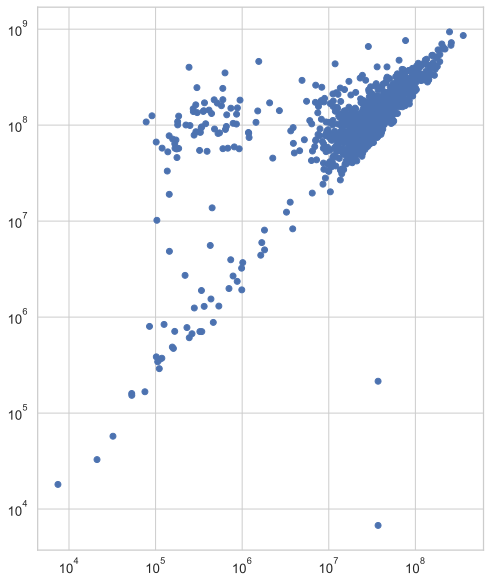

In [489]:
plt.loglog(df['Domestic_Opening'],df['Domestic_Gross'],'o')
plt.savefig("DomOpening_DomGross.pdf");

In [480]:
X_all=df.drop(columns=['Domestic_Gross','Foreign_Gross','World_Gross',
                       'Domestic_Percentage','Foreign_Percentage','index','Rank']) #X_all = all columns except target (y)
y=df['Domestic_Gross'].values

In [481]:
X_all.columns #Ratings, Top Distributors, Genres

Index(['Year', 'Domestic_Opening', 'Budget', 'Release_Month', 'Runtime',
       'Markets', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War',
       'Western', 'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'G', 'PG',
       'PG13', 'R'],
      dtype='object')

In [483]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_all)
#X_std = pd.DataFrame(X_std, columns = columns) #dont apply x-std to df because it messes up the reg

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20)

In [485]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test) #score on test

0.8333037395672821

In [336]:
reg.score(X_train, y_train) #score on training

0.7742402768376083

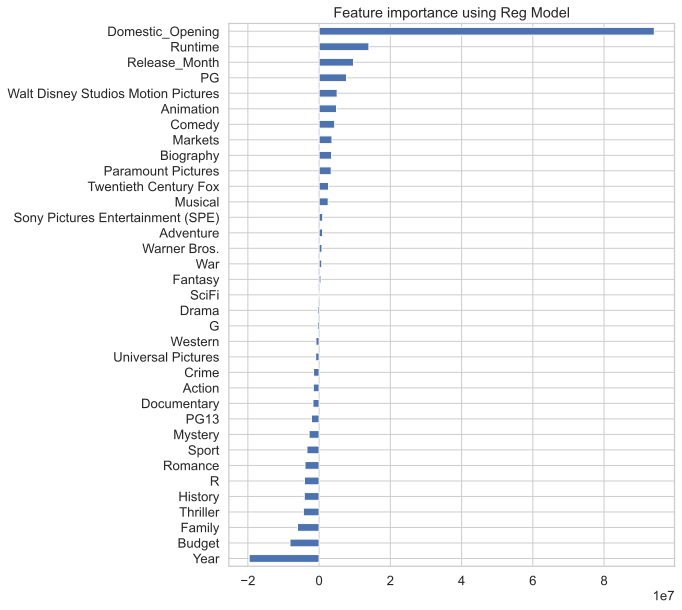

In [491]:
coef = pd.Series(reg.coef_, index = X_all.columns)

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Reg Model")
plt.savefig("Regression_feat_importance.png");

In [524]:
print(df['Action'].value_counts())
print(df['Adventure'].value_counts())
print(df['Animation'].value_counts())
print(df['Biography'].value_counts())
print(df['Comedy'].value_counts())
print(df['Crime'].value_counts())
print(df['Documentary'].value_counts())
print(df['Drama'].value_counts())
print(df['Family'].value_counts())
print(df['Fantasy'].value_counts())
print(df['History'].value_counts())
print(df['Musical'].value_counts())
print(df['Mystery'].value_counts())
print(df['Romance'].value_counts())
print(df['SciFi'].value_counts())
print(df['Sport'].value_counts())
print(df['Thriller'].value_counts())
print(df['War'].value_counts())
print(df['Western'].value_counts())

#top movies in greatest num: 

0    643
1    543
Name: Action, dtype: int64
0    627
1    559
Name: Adventure, dtype: int64
0    1019
1     167
Name: Animation, dtype: int64
0    1141
1      45
Name: Biography, dtype: int64
0    703
1    483
Name: Comedy, dtype: int64
0    1006
1     180
Name: Crime, dtype: int64
0    1183
1       3
Name: Documentary, dtype: int64
0    766
1    420
Name: Drama, dtype: int64
0    913
1    273
Name: Family, dtype: int64
0    886
1    300
Name: Fantasy, dtype: int64
0    1143
1      43
Name: History, dtype: int64
0    1133
1      53
Name: Musical, dtype: int64
0    1066
1     120
Name: Mystery, dtype: int64
0    997
1    189
Name: Romance, dtype: int64
0    912
1    274
Name: SciFi, dtype: int64
0    1156
1      30
Name: Sport, dtype: int64
0    847
1    339
Name: Thriller, dtype: int64
0    1141
1      45
Name: War, dtype: int64
0    1168
1      18
Name: Western, dtype: int64


In [525]:
print(df['G'].value_counts())
print(df['PG'].value_counts())
print(df['PG13'].value_counts())
print(df['R'].value_counts())

0    1168
1      18
Name: G, dtype: int64
0    947
1    239
Name: PG, dtype: int64
0    679
1    507
Name: PG13, dtype: int64
0    907
1    279
Name: R, dtype: int64


In [527]:
#these are the top 6 distributors (studios) -- but for further analysis, I'll just look at one
print(df['Paramount Pictures'].value_counts())
print(df['Sony Pictures Entertainment (SPE)'].value_counts())
print(df['Twentieth Century Fox'].value_counts())
print(df['Universal Pictures'].value_counts())
print(df['Walt Disney Studios Motion Pictures'].value_counts())
print(df['Warner Bros.'].value_counts())

0    1076
1     110
Name: Paramount Pictures, dtype: int64
0    1064
1     122
Name: Sony Pictures Entertainment (SPE), dtype: int64
0    1037
1     149
Name: Twentieth Century Fox, dtype: int64
0    1030
1     156
Name: Universal Pictures, dtype: int64
0    1014
1     172
Name: Walt Disney Studios Motion Pictures, dtype: int64
0    991
1    195
Name: Warner Bros., dtype: int64


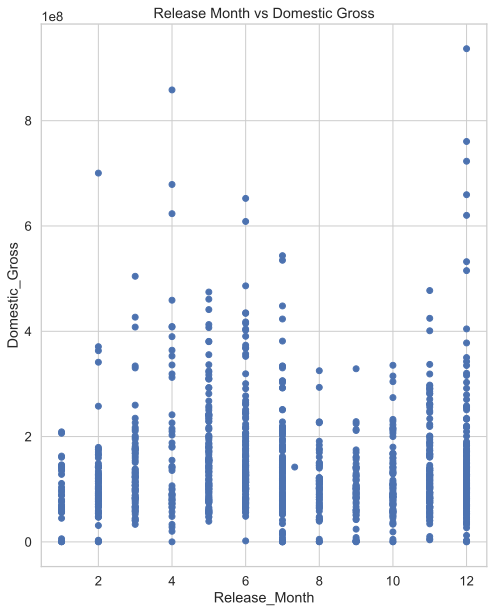

In [492]:
plt.plot(df['Release_Month'],df['Domestic_Gross'],'o')
plt.title('Release Month vs Domestic Gross')
plt.xlabel('Release_Month')
plt.ylabel('Domestic_Gross')
plt.savefig("Release_MonthvsDomGross.png");

In [493]:
X_train.shape

(948, 35)

In [494]:
y_train.shape

(948,)

In [495]:
import statsmodels.api as sm

In [496]:
ols = sm.OLS(y_train,X_train)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.252
Model:                            OLS   Adj. R-squared (uncentered):              0.223
Method:                 Least Squares   F-statistic:                              8.791
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                    4.75e-38
Time:                        00:29:39   Log-Likelihood:                         -19203.
No. Observations:                 948   AIC:                                  3.848e+04
Df Residuals:                     913   BIC:                                  3.865e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.824e+07   5.41e+06     -3.374      0.001   -2.89e+07   -7.63e+06
x2          9.294e+07   6.75e+06     13.768      0.000    7.97e+07    1.06e+08
x3         -1.205e+07   7.19e+06     -1.675      0.094   -2.62e+07    2.07e+06
x4          9.111e+06   5.46e+06      1.668      0.096   -1.61e+06    1.98e+07
x5          1.735e+07   6.94e+06      2.502      0.013    3.74e+06     3.1e+07
x6           1.46e+06   5.21e+06      0.280      0.779   -8.77e+06    1.17e+07
x7           8.59e+04   7.13e+06      0.012      0.990   -1.39e+07    1.41e+07
x8           5.17e+06   7.47e+06      0.692      0.489   -9.49e+06    1.98e+07
x9           9.33e+06   7.68e+06      1.215      0.225   -5.74e+06    2.44e+07
x10         4.269e+06   5.51e+06      0.775      0.438   -6.54e+06    1.51e+07
x11          5.06e+06   7.36e+06      0.688      0.492   -9.38e+06    1.95e+07
x12        -1.375e+05   5.79e+06     -0.024      0.981   -1.15e+07    1.12e+07
x13        -2.968e+06   5.61e+06     -0.530      0.597    -1.4e+07    8.03e+06
x14         1.918e+06   6.49e+06      0.295      0.768   -1.08e+07    1.47e+07
x15        -9.932e+06   1.02e+07     -0.971      0.332      -3e+07    1.01e+07
x16         3.833e+06   6.22e+06      0.616      0.538   -8.38e+06     1.6e+07
x17        -5.099e+06   5.59e+06     -0.912      0.362   -1.61e+07    5.87e+06
x18         6.292e+05   5.57e+06      0.113      0.910   -1.03e+07    1.16e+07
x19        -7.833e+06   5.74e+06     -1.364      0.173   -1.91e+07    3.43e+06
x20        -7.047e+06   6.08e+06     -1.158      0.247    -1.9e+07    4.89e+06
x21        -4.885e+05   5.94e+06     -0.082      0.934   -1.21e+07    1.12e+07
x22        -2.695e+06   5.18e+06     -0.520      0.603   -1.29e+07    7.47e+06
x23        -3.236e+06    6.5e+06     -0.497      0.619    -1.6e+07    9.53e+06
x24         1.047e+06   5.57e+06      0.188      0.851   -9.88e+06     1.2e+07
x25        -2.968e+05   5.06e+06     -0.059      0.953   -1.02e+07    9.63e+06
x26         7.176e+06   5.84e+06      1.228      0.220   -4.29e+06    1.86e+07
x27         3.184e+06   6.04e+06      0.528      0.598   -8.66e+06     1.5e+07
x28         3.599e+06   6.26e+06      0.575      0.565   -8.68e+06    1.59e+07
x29         6.518e+06    5.9e+06      1.104      0.270   -5.06e+06    1.81e+07
x30         8.155e+06   6.59e+06      1.238      0.216   -4.77e+06    2.11e+07
x31         3.409e+06   6.37e+06      0.535      0.593    -9.1e+06    1.59e+07
x32        -2.811e+06   5.69e+06     -0.494      0.621    -1.4e+07    8.36e+06
x33         1.497e+06   8.67e+06      0.173      0.863   -1.55e+07    1.85e+07
x34        -1.036e+07    9.5e+06     -1.091      0.275    -2.9e+07    8.28e+06
x35        -1.216e+07   8.56e+06     -1.420      0.156    -2.

In [353]:
#R^2 and adj R^2 are similar

# Lasso

In [497]:
#not much insight from lasso
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.833303740071506

In [498]:
clf.score(X_train, y_train)

0.7346362609487355

In [499]:
y_pred=reg.predict(X_test)

In [361]:
#y_pred

Text(0, 0.5, 'y_pred')

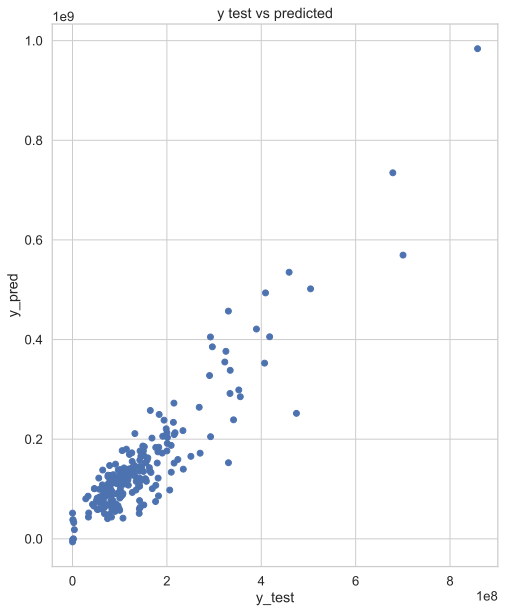

In [501]:
plt.plot(y_test,y_pred,'o')
plt.title('y test vs predicted')
plt.xlabel('y_test')
plt.ylabel('y_pred')

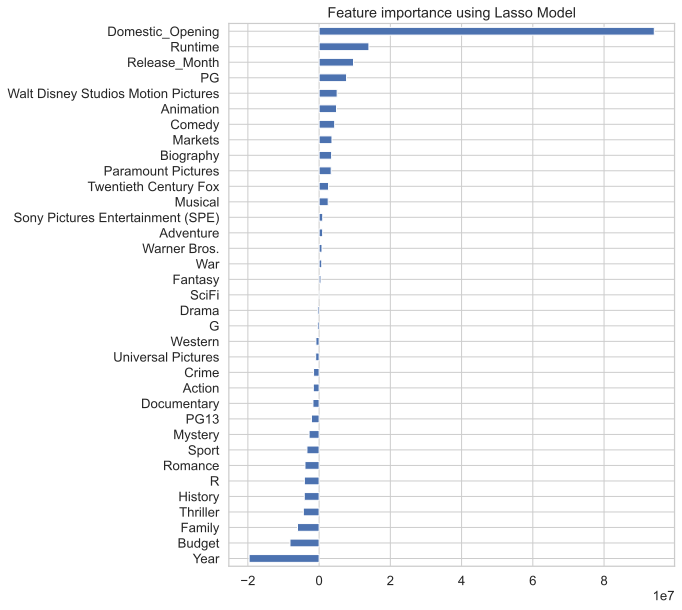

In [502]:
coef = pd.Series(clf.coef_, index = X_all.columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.savefig("Lasso_feat_importance.png");

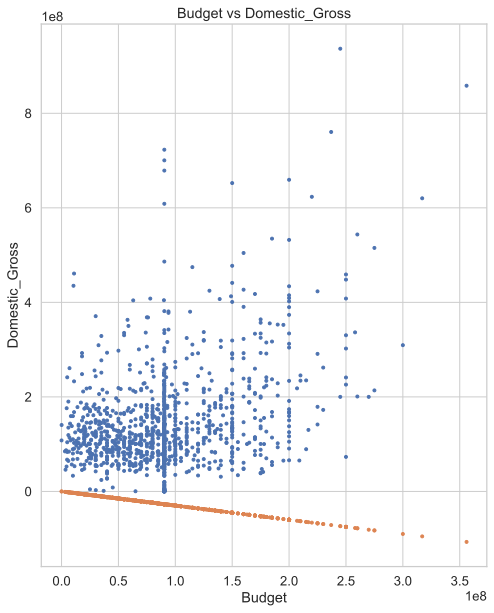

In [503]:
plt.plot(df['Budget'],df['Domestic_Gross'],'.')
plt.plot(df['Budget'],df['Budget']*-.3,'.') 
plt.title('Budget vs Domestic_Gross')
plt.xlabel('Budget')
plt.ylabel('Domestic_Gross')
plt.savefig("BudgvsDom.png");

In [ ]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');

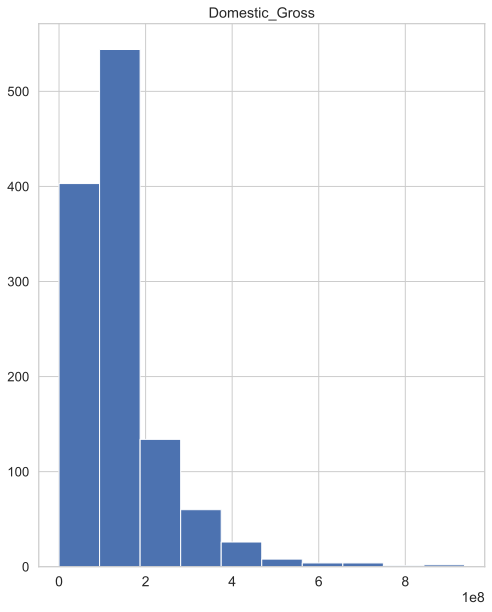

In [721]:
#target variable is not normally distributed

plt.hist(df['Domestic_Gross']); plt.title('Domestic_Gross');

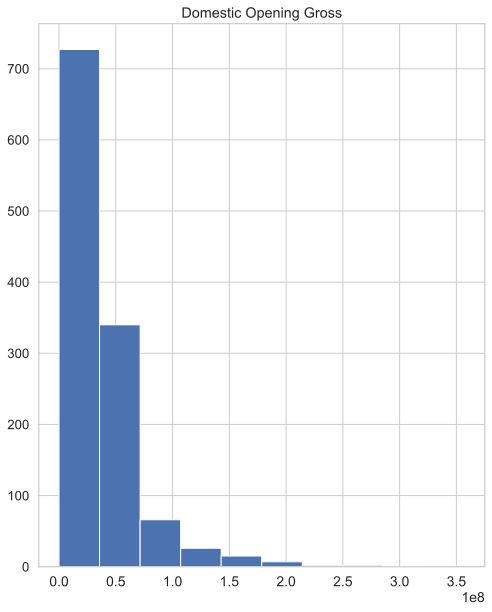

In [723]:
#our main feature is skewed--we may want to get rid of the outliers on the right
plt.hist(df['Domestic_Opening']); plt.title('Domestic Opening Gross');

In [ ]:
sns.pairplot(df, height=1.2, aspect=1.25);

In [ ]:
#top features to look at: 'Runtime','Release_Month','Domestic_Opening','PG','Walt Disney Studios Motion Pictures','Comedy'

In [539]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R'],
      dtype='object')

In [540]:
#CREATE TRAIN/TEST/VALIDATION SETS(80/20)
#set X and y as datasets
X = df.loc[:,['Runtime','Release_Month','Domestic_Opening','PG','Walt Disney Studios Motion Pictures','Comedy']]
y = df['Domestic_Gross']

#Split data into two sections: Train+Val, Testing 
#results in 20 test, 80 training
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) 

In [541]:
#Cross Validation LR on training data
#don't need standard scaler here bc regular linear regression

kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#Create an empty model
#regular cross validation 
lm_cv = LinearRegression()

#fit model
lm_cv.fit(X, y)

print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))

print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

[0.64264989 0.55201618 0.68294258 0.78382308 0.73096479]
0.6784793032462114


In [547]:
#CV Ridge Regression & Lasso need standard scalar
std = StandardScaler()
std.fit(X.values)

X_scaled = std.transform(X.values)
X_test_scaled = std.transform(X_test.values)

In [548]:
#determine best alpha
rm_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

new_ridge=rm_cv.fit(X_scaled, y)
best_alpha = new_ridge.alpha_

print(best_alpha)

TypeError: 'Ridge' object is not callable

In [549]:
#Ridge CV Regression
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
RidgeCV = Ridge(alpha=0.1)

#fit model
RidgeCV.fit(X_scaled, y)

#results from ridge reg cross val
#all five values
print(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2')))

[0.64265109 0.55201005 0.68294477 0.78382591 0.73097015]
0.678480395408861


In [550]:
#determine best alpha
ls_cv = LassoCV(alphas=[0.1, 1.0, 10.0])

new_lasso=ls_cv.fit(X_scaled, y)
best_alpha = new_lasso.alpha_

print(best_alpha)

TypeError: 'Lasso' object is not callable

In [551]:
#Lasso CV Regresion 
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
LassoCV = Lasso(alpha=0.1)

#fit model
LassoCV.fit(X_scaled, y)

#results from ridge reg cross val
#all five values
print(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2')))

[0.64264989 0.55201618 0.68294258 0.78382308 0.73096479]
0.6784793032684675


In [552]:
test_set_pred = LassoCV.predict(X_test_scaled)

In [553]:
#r-squared
r2_score(y_test, test_set_pred)

0.7649617378921963

In [554]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

y_err=mae(y_test, test_set_pred)
print(y_err)

38626771.745739534


Text(0.5, 1.0, 'Domestic Gross')

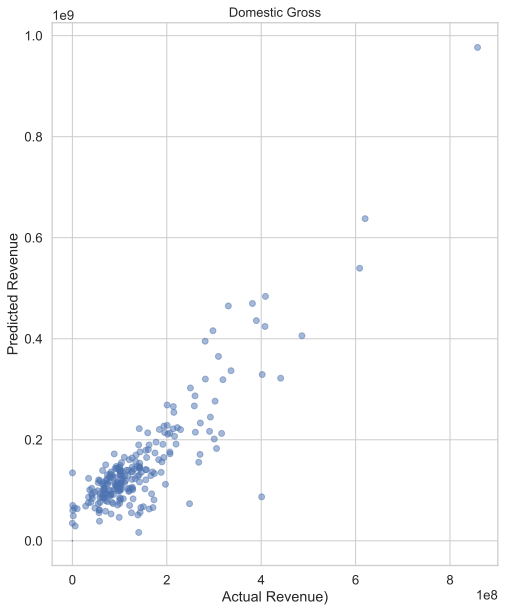

In [557]:
plt.scatter(y_test, test_set_pred, alpha=.5)
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.xlabel("Actual Revenue)")
plt.ylabel("Predicted Revenue")
plt.title("Domestic Gross", fontsize=13)

# another method 

In [392]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R'],
      dtype='object')

genres: 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 

In [396]:
print(df['Action'].value_counts())
print(df['Adventure'].value_counts())
print(df['Animation'].value_counts())
print(df['Biography'].value_counts())
print(df['Comedy'].value_counts())
print(df['Crime'].value_counts())
print(df['Documentary'].value_counts())
print(df['Drama'].value_counts())
print(df['Family'].value_counts())
print(df['Fantasy'].value_counts())
print(df['History'].value_counts())
print(df['Musical'].value_counts())
print(df['Mystery'].value_counts())
print(df['Romance'].value_counts())
print(df['SciFi'].value_counts())
print(df['Sport'].value_counts())
print(df['Thriller'].value_counts())
print(df['War'].value_counts())
print(df['Western'].value_counts())

0    643
1    543
Name: Action, dtype: int64
0    627
1    559
Name: Adventure, dtype: int64
0    1019
1     167
Name: Animation, dtype: int64
0    1141
1      45
Name: Biography, dtype: int64
0    703
1    483
Name: Comedy, dtype: int64
0    1006
1     180
Name: Crime, dtype: int64
0    1183
1       3
Name: Documentary, dtype: int64
0    766
1    420
Name: Drama, dtype: int64
0    913
1    273
Name: Family, dtype: int64
0    886
1    300
Name: Fantasy, dtype: int64
0    1143
1      43
Name: History, dtype: int64
0    1133
1      53
Name: Musical, dtype: int64
0    1066
1     120
Name: Mystery, dtype: int64
0    997
1    189
Name: Romance, dtype: int64
0    912
1    274
Name: SciFi, dtype: int64
0    1156
1      30
Name: Sport, dtype: int64
0    847
1    339
Name: Thriller, dtype: int64
0    1141
1      45
Name: War, dtype: int64
0    1168
1      18
Name: Western, dtype: int64


choose most popular genres

In [565]:
# Top 8 Genres in terms of most number of films
df['Top_Genres'] = df['Action'] + df['Adventure'] + df['Comedy']+ df['Drama']+ df['Fantasy']+ df['Family']+ df['SciFi'] + df['Thriller']

In [566]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [567]:
print(df['G'].value_counts())
print(df['PG'].value_counts())
print(df['PG13'].value_counts())
print(df['R'].value_counts())

0    1168
1      18
Name: G, dtype: int64
0    947
1    239
Name: PG, dtype: int64
0    679
1    507
Name: PG13, dtype: int64
0    907
1    279
Name: R, dtype: int64


In [574]:
Release_Month = ["Release_Month"]
# G = ["G"]
PG = ["PG"]
# PG13 = ["PG13"]
# R = ["R"]
Runtime = ["Runtime"]
Top_Genres = ["Top_Genres"]
Comedy = ["Comedy"]
Domestic_Opening = ["Domestic_Opening"]
Markets = ["Markets"]
Budget = ["Budget"]
Disney = ['Walt Disney Studios Motion Pictures']

In [578]:
#columns to study
X_columns = Release_Month + PG + Runtime + Domestic_Opening + Markets + Budget + Disney +Comedy

In [579]:
X = df.loc[:,X_columns]
y = df["Domestic_Gross"]

In [581]:
# baseline model & OLS regression summary stats
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Domestic_Gross   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     370.2
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          5.15e-315
Time:                        01:44:56   Log-Likelihood:                -22836.
No. Observations:                1186   AIC:                         4.569e+04
Df Residuals:                    1177   BIC:                         4.574e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -5.727e+07   1.26e+07     -4.540      0.000    -8.2e+07   -3.25e+07
Release_Month                        2.933e+06    5.1e+05      5.752      0.000    1.93e+06    3.93e+06
PG                                    2.12e+07   4.51e+06      4.704      0.000    1.24e+07       3e+07
Runtime                              6.689e+05   9.51e+04      7.037      0.000    4.82e+05    8.55e+05
Domestic_Opening                        2.5374      0.055     45.989      0.000       2.429       2.646
Markets                              1.863e+05    1.1e+05      1.698      0.090    -2.9e+04    4.02e+05
Budget                                 -0.1828      0.038     -4.840      0.000      -0.257      -0.109
Walt Disney Studios Motion Pictures  1.806e+07   4.89e+06      3.692      0.000    8.46e+06    2.77e+07
Comedy                               1.421e+07   3.93e+06      3.618      0.000     6.5e+06    2.19e+07
==============================================================================
Omnibus:                      802.799   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15735.984
Skew:                           2.844   Prob(JB):                         0.00
Kurtosis:                      19.914   Cond. No.                     8.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Predicted vs Residual')

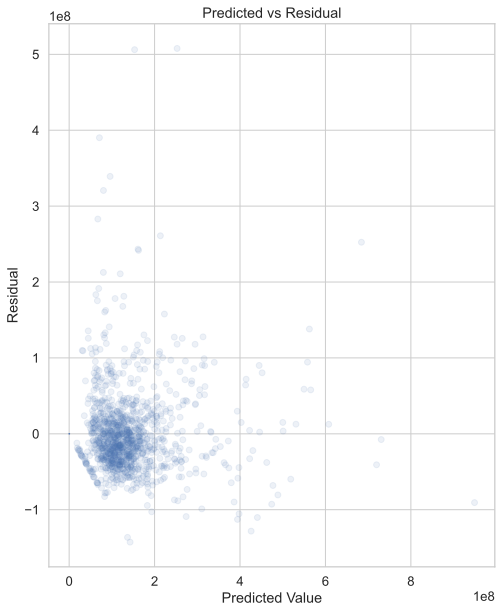

In [582]:
# Baseline residual plot not great

y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Predicted vs Residual')

# Method 1: Train/Test/Validation

In [583]:
# Hold out 20% of data for final test set
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) 

# Hold out other 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [584]:
# Scale data so all features on same scale
# Set up the 3 models we're choosing from
std = StandardScaler()
std.fit(X_train)

StandardScaler()

### Linear Regression

In [585]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [586]:
lm.score(X_val,y_val)


0.7119899346370626

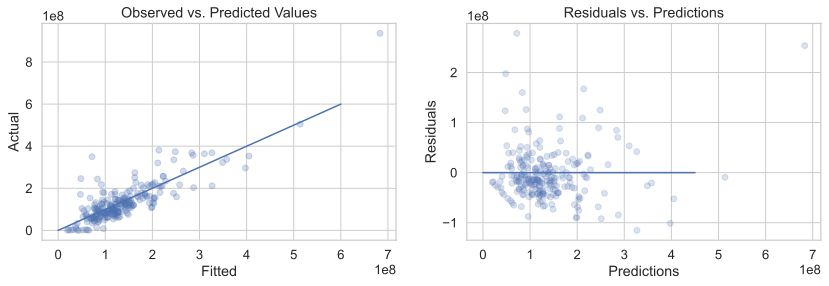

In [589]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = lm.predict(X_val)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 600000000], [0, 600000000])
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
lm_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, lm_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");

In [603]:
# Coefficients for each feature
list(zip(X_columns,lm.coef_))

[('Release_Month', 2593456.986617257),
 ('PG', 32930585.428579986),
 ('Runtime', 891585.3468024399),
 ('Domestic_Opening', 2.570206494174066),
 ('Markets', 227464.12441679987),
 ('Budget', -0.2303830875888889),
 ('Walt Disney Studios Motion Pictures', 11309934.366691733),
 ('Comedy', 12245050.263509898)]

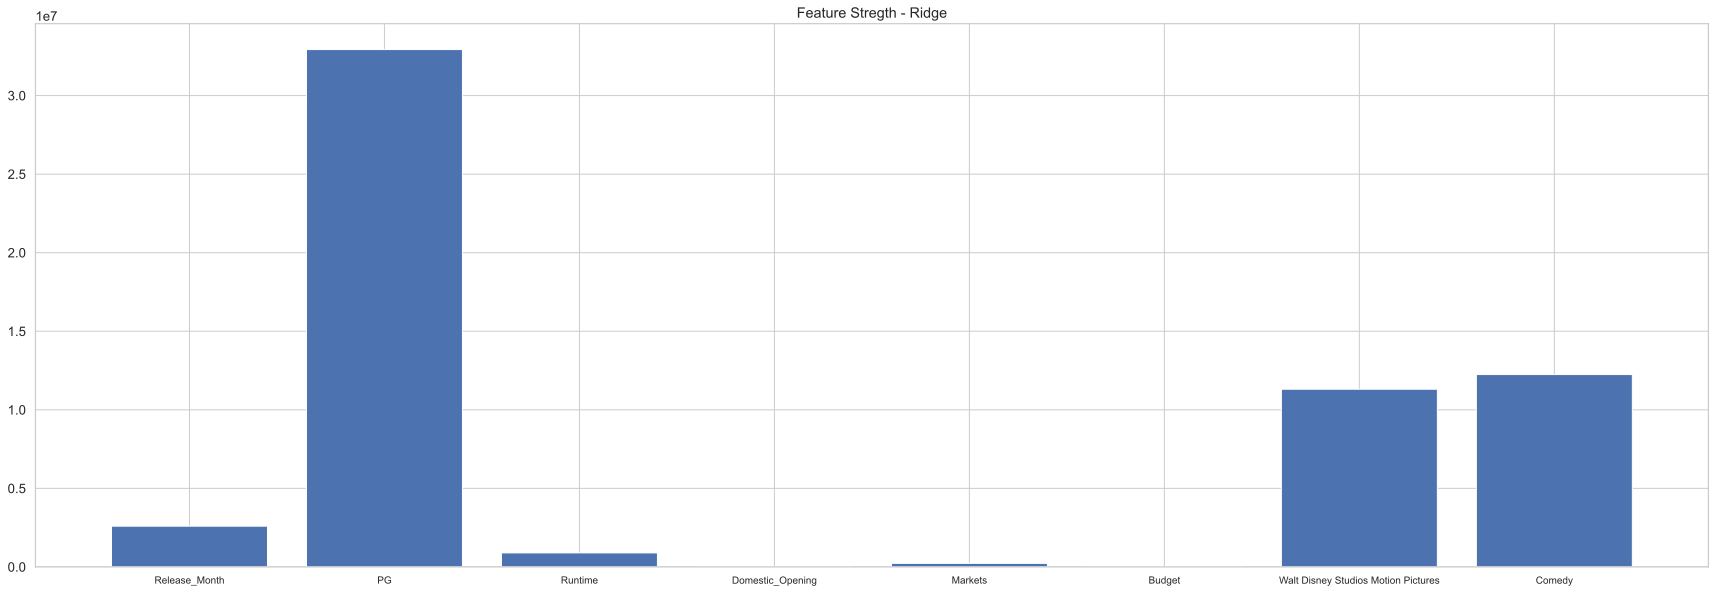

In [604]:
plt.figure(figsize=(30,10))
plt.rc('xtick',labelsize=10)
plt.bar(X_columns,lm.coef_)
plt.title('Feature Stregth - Ridge')
plt.savefig('Feature_Plot.pdf');

In [605]:
y_pred.shape

(237,)

In [606]:
# Using Ridge regularization and cross validation
# Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

In [607]:
lm_lasso = Lasso()  

In [608]:
# Trying polynomial features for the datasets

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

In [609]:
lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))

lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))

lm_lasso.fit(X_train_scaled, y_train)
print('Lasso Regression val R^2: %.3f', lm_lasso.score(X_val_scaled, y_val))

lm_poly.fit(X_train_poly, y_train)
print('Degree 2 polynomial regression val R^2: %.3f', lm_poly.score(X_val_poly, y_val))

Linear Regression val R^2: %.3f 0.7119899346370626
Ridge Regression val R^2: %.3f 0.7119666711010519
Lasso Regression val R^2: %.3f 0.7119899372074465
Degree 2 polynomial regression val R^2: %.3f 0.5163468496601873


Lasso Reg gives best score so far

In [610]:
list(zip(X_columns,lm_reg.coef_))

[('Release_Month', 8526333.753819192),
 ('PG', 12876174.742134342),
 ('Runtime', 18323255.85001324),
 ('Domestic_Opening', 88020576.12407348),
 ('Markets', 3449035.873979977),
 ('Budget', -11947162.868246038),
 ('Walt Disney Studios Motion Pictures', 3996031.6525670104),
 ('Comedy', 5956455.671722802)]

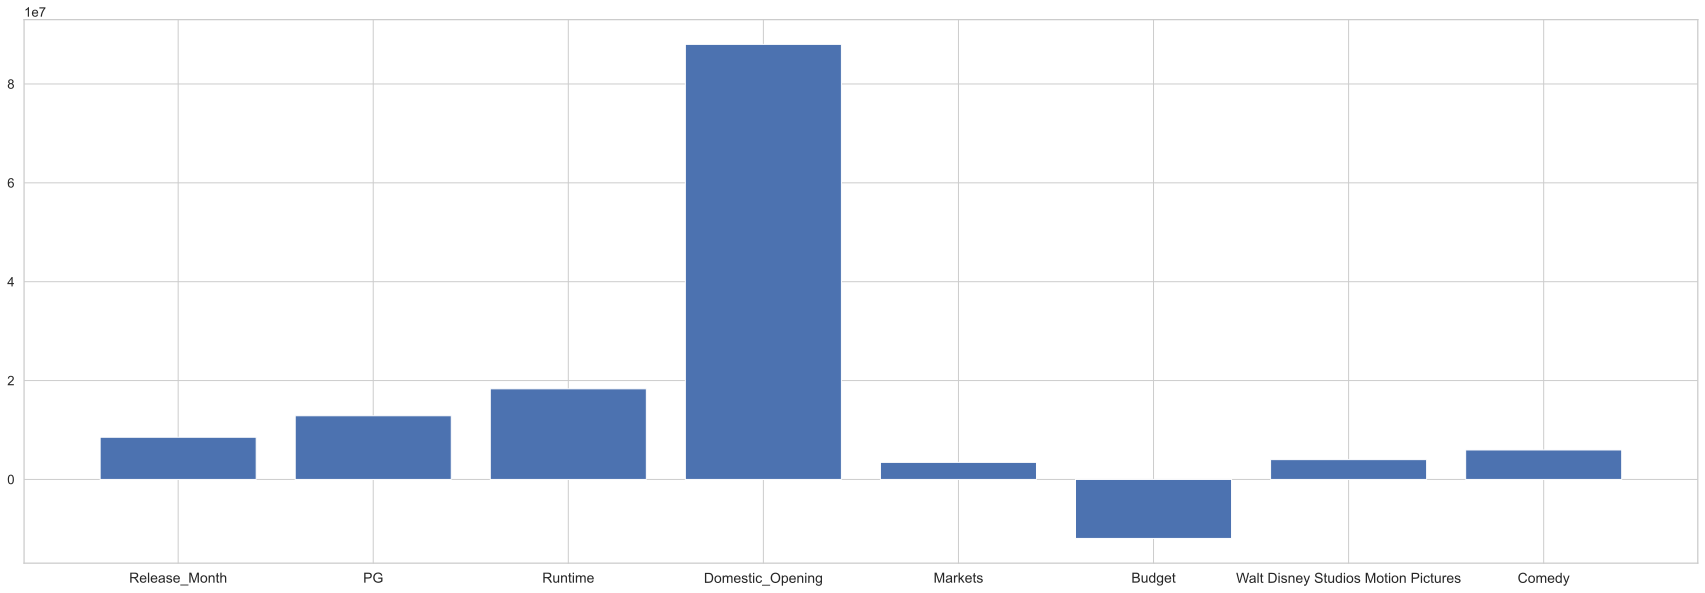

In [611]:
# Important as standardized so can see relative importance
plt.figure(figsize=(30,10))
plt.rc('xtick', labelsize=14)
plt.bar(X_columns,lm_reg.coef_)
plt.savefig("Feature_Plot_Ridge.pdf");

In [612]:
RMSE(lm_reg.predict(X_val_scaled),y_val)

52103184.16306101

# Method 2: Cross-Validation / Test
Cross Validation goal is to make efficient use of the data available to us (using 80% instead of 60% above), while also performing multiple validation checks. For k-fold CV, do k train/validation splits so that each observation is in the validation set exactly 1 time. As we loop through CV folds, we will train and validate both models and collect the results to compare at the end. Note that we scale the training features within the CV loop.

In [613]:
y = df["Domestic_Gross"]
X = df.loc[:,X_columns]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [614]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_cv = LinearRegression()
lm_reg_cv = Ridge(alpha=1)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [615]:
print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

[0.81141406 0.77068126 0.585361   0.62800604 0.72866714]
0.7048258991390155


In [616]:
print(cross_val_score(lm_reg_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_reg_cv, X, y, cv=kf, scoring='r2')))

[0.81147403 0.77070832 0.58543665 0.62790716 0.72886971]
0.7048791730488346


/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75687e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8059e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64195e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57744e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/lilygoldwasser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

In [617]:
lm_lasso_cv = Lasso()
print(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2'))
print(np.mean(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2')))

[0.81141406 0.77068126 0.58536101 0.62800603 0.72866715]
0.7048258995432326


In [618]:
print(cross_val_score(lm_poly, X, y,    
                                cv=kf,                
                                scoring='r2'))
print(np.mean(cross_val_score(lm_poly, X, y,    
                                cv=kf,                
                                scoring='r2')))

[0.81141406 0.77068126 0.585361   0.62800604 0.72866714]
0.7048258991390155


### other models

In [624]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.7051886971520466

In [625]:
RMSE(rf.predict(X_val),y_val)


52712663.143177904

In [626]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.728813027422631

In [627]:
RMSE(gbm.predict(X_val),y_val)

50556535.41287602

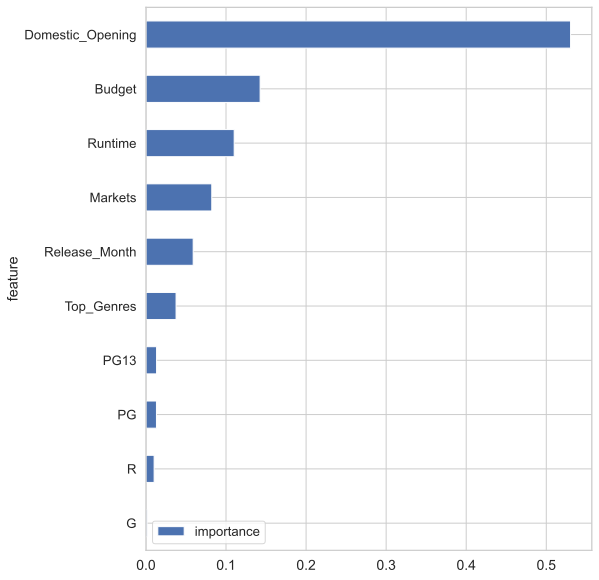

In [628]:
features = list(zip(X_train.columns,rf.feature_importances_))
features = sorted(feat_imps, key = lambda x: x[1], reverse=False)
features = pd.DataFrame(feat_imps, columns=['feature','importance'])

features.plot(x='feature',y='importance',kind='barh')

plt.savefig("RandomForestRegressor.pdf")

# another way

In [637]:
X_all=df.drop(columns=['Domestic_Gross']) #X_all = all columns except target (y)
y=df['Domestic_Gross'].values

In [638]:
y

array([7.60507625e+08, 8.58373000e+08, 6.59363944e+08, ...,
       5.06486790e+07, 4.63513450e+07, 4.64624690e+07])

In [639]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [652]:
X=df[['Release_Month','PG','Runtime','Domestic_Opening','Markets','Budget','Walt Disney Studios Motion Pictures','Comedy']]
X

,Release_Month,PG,Runtime,Domestic_Opening,Markets,Budget,Walt Disney Studios Motion Pictures,Comedy
0,12.0,0,162.0,77025481.0,77.000000,2.370000e+08,0,0
1,4.0,0,181.0,357115007.0,77.000000,3.560000e+08,1,0
2,12.0,0,194.0,28638131.0,50.452381,2.000000e+08,0,0
3,12.0,0,138.0,247966675.0,62.000000,2.450000e+08,1,0
4,4.0,0,149.0,257698183.0,54.000000,9.034442e+07,1,0
...,...,...,...,...,...,...,...,...
1182,8.0,1,97.0,10354073.0,50.452381,6.500000e+07,0,1
1183,10.0,0,93.0,31725652.0,50.452381,4.000000e+06,0,0
1184,9.0,0,94.0,23678580.0,50.452381,9.034442e+07,0,0
1185,11.0,0,120.0,11133231.0,50.452381,9.034442e+07,0,0


In [653]:
X.columns

Index(['Release_Month', 'PG', 'Runtime', 'Domestic_Opening', 'Markets',
       'Budget', 'Walt Disney Studios Motion Pictures', 'Comedy'],
      dtype='object')

In [654]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#X_std = pd.DataFrame(X_std, columns = columns) #dont apply x-std to df because it messes up the reg

In [655]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [656]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6429228434369867

## Lasso

In [657]:
#not much insight from lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6429228448203701

In [658]:
reg.score(X_test, y_test)

0.6429228434369867

In [659]:
y_pred=reg.predict(X_test)

In [245]:
# y_pred

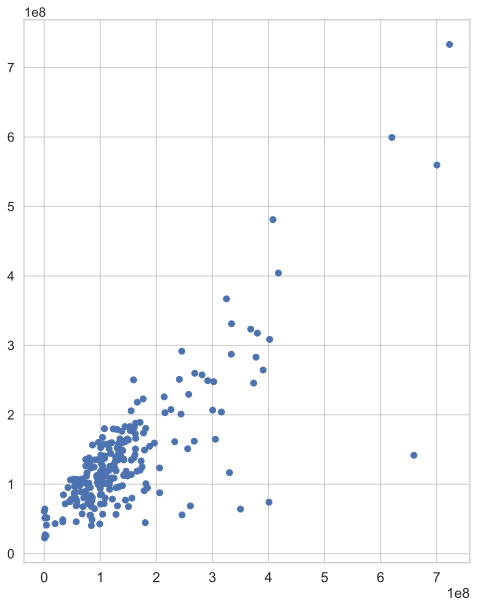

In [648]:
plt.plot(y_test,y_pred,'o')

### Domestic Gross vs World Gross vs Budget

In [649]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [651]:
# x1=df.World_Gross[df.Domestic_Gross<1000000000]
# y=df.Domestic_Gross[df.Domestic_Gross<1000000000]
# x2=df.Budget[df.Domestic_Gross<1000000000]

# rgr = linear_model.LinearRegression()
# rgr2 = linear_model.LinearRegression()
# # rgr.fit(x1.reshape(len(x1),1),y)
# # rgr2.fit(x2.reshape(len(x2),1),y)
# fig=plt.figure(figsize=(12,10))


# ax=fig.add_subplot(3,1,1)
# plt.scatter(x1,y)
# # plt.plot(x1,rgr.predict(x1.reshape(len(x1),1)),color='red',linewidth=2,markersize=1)
# # plt.plot(x1,rgr.predict(x1.reshape(len(x1),1)),color='red',linewidth=2,markersize=1)


# ax.set_title('World Gross vs Domestic Gross',fontsize=18)
# ax.set_xlabel('World Gross ($)',fontsize=10)
# ax.set_ylabel('Domestic Gross ($)',fontsize=10)
# plt.ylim([0,600000000])
# plt.xlim([0,3e8])
# # ax.set_axis_bgcolor('white')

# ax=fig.add_subplot(3,1,2)
# plt.scatter(x2,y)
# # plt.plot(x2,rgr.predict(x2.reshape(len(x2),1)),color='red',linewidth=2)
# ax.set_title('Movie Budget vs. Domestic Gross',fontsize=18)
# ax.set_xlabel('Movie Budget ($)',fontsize=10)
# ax.set_ylabel('Domestic Gross ($)',fontsize=10)
# plt.ylim([0,600000000])
# plt.xlim([0,1.5e8])
# # ax.set_axis_bgcolor('white')

# fig.tight_layout()

LR

In [660]:
x=df[['Release_Month','PG','Runtime','Domestic_Opening','Markets','Budget','Walt Disney Studios Motion Pictures','Comedy']]
x=sm.add_constant(x)
model = sm.OLS(df['Domestic_Gross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Domestic_Gross   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     370.2
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          5.15e-315
Time:                        02:33:58   Log-Likelihood:                -22836.
No. Observations:                1186   AIC:                         4.569e+04
Df Residuals:                    1177   BIC:                         4.574e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -5.727e+07   1.26e+07     -4.540      0.000    -8.2e+07   -3.25e+07
Release_Month                        2.933e+06    5.1e+05      5.752      0.000    1.93e+06    3.93e+06
PG                                    2.12e+07   4.51e+06      4.704      0.000    1.24e+07       3e+07
Runtime                              6.689e+05   9.51e+04      7.037      0.000    4.82e+05    8.55e+05
Domestic_Opening                        2.5374      0.055     45.989      0.000       2.429       2.646
Markets                              1.863e+05    1.1e+05      1.698      0.090    -2.9e+04    4.02e+05
Budget                                 -0.1828      0.038     -4.840      0.000      -0.257      -0.109
Walt Disney Studios Motion Pictures  1.806e+07   4.89e+06      3.692      0.000    8.46e+06    2.77e+07
Comedy                               1.421e+07   3.93e+06      3.618      0.000     6.5e+06    2.19e+07
==============================================================================
Omnibus:                      802.799   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15735.984
Skew:                           2.844   Prob(JB):                         0.00
Kurtosis:                      19.914   Cond. No.                     8.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

plot the model predictions vs actuals:

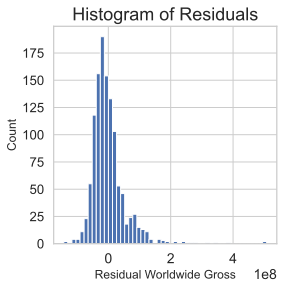

In [666]:
fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
model.resid.hist(bins=50)
ax.set_xlabel('Residual Worldwide Gross',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Histogram of Residuals',fontsize=18)
ttl=ax.title
ttl.set_position([.5, 1.1])

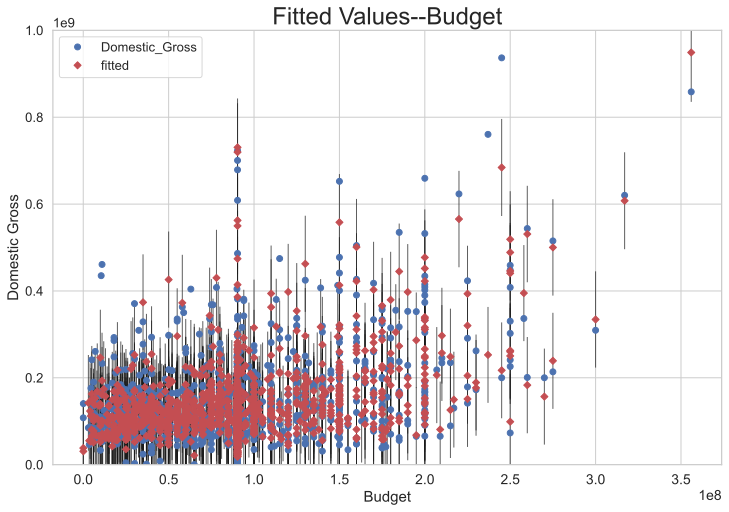

In [667]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "Budget", ax=ax,markersize=5)
ax.set_title('Fitted Values--Budget',fontsize=24)
ax.set_ylim([0,1e9])
ax.set_xlabel('Budget',fontsize=15)
ax.set_ylabel('Domestic Gross',fontsize=15)
plt.legend(loc=2,prop={'size':13})

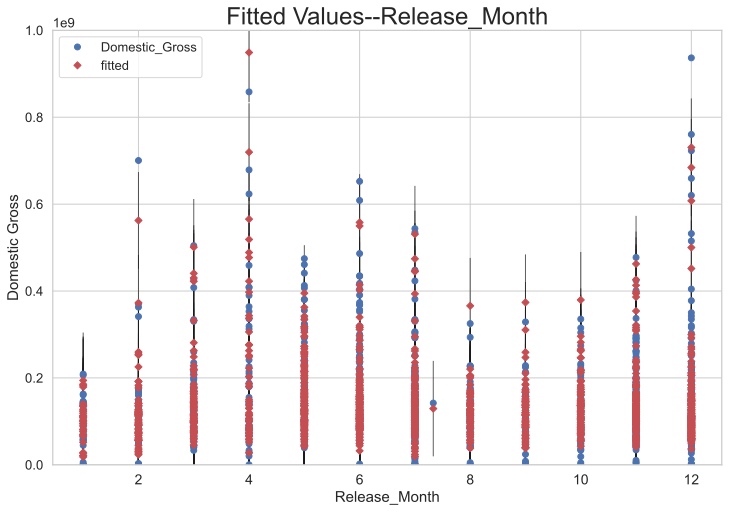

In [670]:
# x=df[['Runtime','Domestic_Opening','Budget','World_Gross','Release_Month','Markets','Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
#        'Universal Pictures', 'Walt Disney Studios Motion Pictures','Warner Bros.','G', 'PG','PG13', 'R']]
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "Release_Month", ax=ax,markersize=5)
ax.set_title('Fitted Values--Release_Month',fontsize=24)
ax.set_ylim([0,1e9])
ax.set_xlabel('Release_Month',fontsize=15)
ax.set_ylabel('Domestic Gross',fontsize=15)
# ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':13})

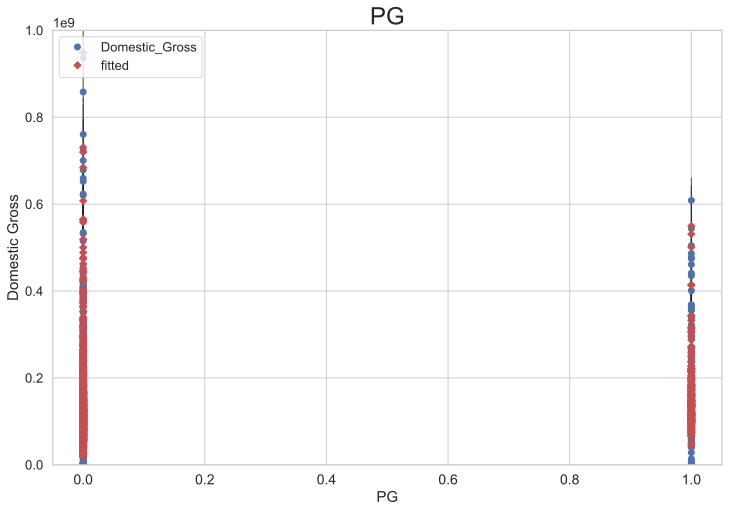

In [674]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "PG", ax=ax,markersize=5)
ax.set_title('PG',fontsize=24)
ax.set_ylim([0,1e9])
ax.set_xlabel('PG',fontsize=15)
ax.set_ylabel('Domestic Gross',fontsize=15)
# ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':13})

In [675]:
df.to_csv = ('/Users/lilygoldwasser/Documents/metis/Regression/csv/regression.csv')

In [676]:
df

,index,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,...,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG13,R,Top_Genres
0,0,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,77025481.0,2.370000e+08,...,0,1,0,0,0,0,0,1,0,4
1,2,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,357115007.0,3.560000e+08,...,0,0,0,1,0,0,0,1,0,4
2,4,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,28638131.0,2.000000e+08,...,0,0,0,0,0,0,0,1,0,1
3,6,4,2069521700,936662225.0,45.3,1132859475,54.7,2015,247966675.0,2.450000e+08,...,0,0,0,1,0,0,0,1,0,3
4,8,5,2048359754,678815482.0,33.1,1369544272,66.9,2018,257698183.0,9.034442e+07,...,0,0,0,1,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,1426,1196,147792047,41667116.0,28.2,106124931,71.8,2019,10354073.0,6.500000e+07,...,1,0,0,0,0,0,1,0,0,4
1183,1427,1197,147748505,87039965.0,58.9,60708540,41.1,2005,31725652.0,4.000000e+06,...,0,0,0,0,0,0,0,0,1,0
1184,1428,1198,147717833,50648679.0,34.3,97069154,65.7,2007,23678580.0,9.034442e+07,...,0,0,0,0,0,0,0,0,1,4
1185,1429,1199,147554998,46351345.0,31.4,101203653,68.6,1996,11133231.0,9.034442e+07,...,0,1,0,0,0,0,0,1,0,1


In [684]:
df

,index,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,...,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG13,R,Top_Genres
0,0,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,77025481.0,2.370000e+08,...,0,1,0,0,0,0,0,1,0,4
1,2,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,357115007.0,3.560000e+08,...,0,0,0,1,0,0,0,1,0,4
2,4,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,28638131.0,2.000000e+08,...,0,0,0,0,0,0,0,1,0,1
3,6,4,2069521700,936662225.0,45.3,1132859475,54.7,2015,247966675.0,2.450000e+08,...,0,0,0,1,0,0,0,1,0,3
4,8,5,2048359754,678815482.0,33.1,1369544272,66.9,2018,257698183.0,9.034442e+07,...,0,0,0,1,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,1426,1196,147792047,41667116.0,28.2,106124931,71.8,2019,10354073.0,6.500000e+07,...,1,0,0,0,0,0,1,0,0,4
1183,1427,1197,147748505,87039965.0,58.9,60708540,41.1,2005,31725652.0,4.000000e+06,...,0,0,0,0,0,0,0,0,1,0
1184,1428,1198,147717833,50648679.0,34.3,97069154,65.7,2007,23678580.0,9.034442e+07,...,0,0,0,0,0,0,0,0,1,4
1185,1429,1199,147554998,46351345.0,31.4,101203653,68.6,1996,11133231.0,9.034442e+07,...,0,1,0,0,0,0,0,1,0,1


In [702]:
linear_df = df.drop(['index','Rank','World_Gross','Domestic_Opening','Domestic_Percentage', 'Foreign_Gross', 'Foreign_Percentage'],1)

linear_df.columns


Index(['Domestic_Gross', 'Year', 'Budget', 'Release_Month', 'Runtime',
       'Markets', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War',
       'Western', 'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'G', 'PG',
       'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [703]:
df.columns

Index(['index', 'Rank', 'World_Gross', 'Domestic_Gross', 'Domestic_Percentage',
       'Foreign_Gross', 'Foreign_Percentage', 'Year', 'Domestic_Opening',
       'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Sport', 'Thriller', 'War', 'Western', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G', 'PG', 'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [88]:
# TRAIN TEST SPLIT

In [704]:
X, y = linear_df.drop(['Domestic_Gross'], axis = 1), linear_df['Domestic_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [705]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [706]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
#y_predict = lm.predict(X_val)
#print(f'Linear Regression MSE: {mean_squared_error(X_train, y_train):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression TRAIN R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression VAL R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
#y_poly_predict = lm_poly.predict(X_val_poly)
#print(f'Degree 2 polynomial regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

Linear Regression TRAIN R^2: 0.294
Linear Regression VAL R^2: 0.389
Degree 2 polynomial regression TRAIN R^2: 0.407
Degree 2 polynomial regression VAL R^2: 0.190


In [707]:
#Linear Reg Train R^2 = 0.294
#Linear Reg VAL R^2 = 0.389
0.294/0.389

0.755784061696658

In [708]:
X_train.columns

Index(['Year', 'Budget', 'Release_Month', 'Runtime', 'Markets', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Musical', 'Mystery',
       'Romance', 'SciFi', 'Sport', 'Thriller', 'War', 'Western',
       'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'G', 'PG',
       'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [709]:
lm.coef_

array([-9.50439480e+05,  2.69678183e-01, -1.72225604e+05,  1.44391402e+06,
        7.50046219e+05, -7.20124592e+06,  9.29602484e+06,  2.54168614e+07,
       -1.32325717e+07,  7.77367048e+06,  9.72126374e+06,  4.15556543e+07,
       -2.49152529e+07,  6.23766767e+06, -1.15887276e+07, -4.64328673e+07,
        1.89773578e+07, -1.47723345e+07, -2.01809708e+07,  3.63839774e+07,
       -2.95909092e+07, -2.09636070e+07, -2.19490209e+07, -7.89237267e+07,
       -6.80171542e+06,  8.03932203e+06,  3.53544432e+06,  1.27116446e+07,
        5.58717934e+07,  4.28651353e+06,  2.11123443e+07,  4.16021771e+07,
        3.82634259e+07,  2.04311615e+07, -4.97749306e+06])

# Lasso

In [710]:
linear_df.shape

(1186, 36)

In [711]:
linear_df.head(3)

,Domestic_Gross,Year,Budget,Release_Month,Runtime,Markets,Action,Adventure,Animation,Biography,...,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG13,R,Top_Genres
0,760507625.0,2009,237000000.0,12.0,162.0,77.000000,1,1,0,0,...,0,1,0,0,0,0,0,1,0,4
1,858373000.0,2019,356000000.0,4.0,181.0,77.000000,1,1,0,0,...,0,0,0,1,0,0,0,1,0,4
2,659363944.0,1997,200000000.0,12.0,194.0,50.452381,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [712]:
df.head(3)

,index,Rank,World_Gross,Domestic_Gross,Domestic_Percentage,Foreign_Gross,Foreign_Percentage,Year,Domestic_Opening,Budget,...,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,G,PG,PG13,R,Top_Genres
0,0,1,2847246203,760507625.0,26.7,2086738578,73.3,2009,77025481.0,237000000.0,...,0,1,0,0,0,0,0,1,0,4
1,2,2,2797501328,858373000.0,30.7,1939128328,69.3,2019,357115007.0,356000000.0,...,0,0,0,1,0,0,0,1,0,4
2,4,3,2201647264,659363944.0,30.0,1542283320,70.0,1997,28638131.0,200000000.0,...,0,0,0,0,0,0,0,1,0,1


In [714]:
lasso_df = df.drop(['index','Rank','Domestic_Percentage','Foreign_Percentage'],1)

lasso_df.columns

Index(['World_Gross', 'Domestic_Gross', 'Foreign_Gross', 'Year',
       'Domestic_Opening', 'Budget', 'Release_Month', 'Runtime', 'Markets',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Musical',
       'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War', 'Western',
       'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'G', 'PG',
       'PG13', 'R', 'Top_Genres'],
      dtype='object')

In [715]:
X, y = lasso_df.drop(['Domestic_Gross'], axis = 1), lasso_df['Domestic_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [716]:
#set up lasso regression
lasso = LassoCV()

#Feature transforms for train, val, so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

#scale the features 
scale = StandardScaler(with_mean = False)

X_train_poly_scaled = scale.fit_transform(X_train_poly)
X_val_poly_scaled = scale.transform(X_val_poly)

#fit the features
lasso.fit(X_train_poly_scaled, y_train)

print(f'Lasso TRAIN R^2: {lasso.score(X_train_poly_scaled, y_train):.3f}')
print(f'Lasso VAL R^2: {lasso.score(X_val_poly_scaled, y_val):.3f}')

TypeError: 'Lasso' object is not callable

In [77]:
# Lasso TRAIN R^2: 0.986
# Lasso VAL R^2: 0.984

In [717]:
0.986/0.984

1.0020325203252032

## which features should we remove?

In [718]:
lasso_features = list(zip(poly.get_feature_names(X_train.columns), lasso.coef_))

In [719]:
features_kept = []
for features in lasso_features:
    if abs(features[-1]) > 0:
        features_kept.append(features)

In [720]:
features_kept.sort(reverse=True)
features_kept

[('Year PG', -42989.25144485752),
 ('Year Markets', -1600453.5862039097),
 ('Year Domestic_Opening', -241578.0992261168),
 ('Year Comedy', 1216369.3838533743),
 ('Year Adventure', 16591486.86125885),
 ('Year', 47662.14821075033),
 ('World_Gross Year', 6567537.476102872),
 ('World_Gross Thriller', 224008.76872181124),
 ('World_Gross Sony Pictures Entertainment (SPE)', 548542.6842745354),
 ('World_Gross Musical', 104122.37367334313),
 ('World_Gross Markets', 3110247.05930117),
 ('World_Gross Drama', -2054424.5361634558),
 ('World_Gross Budget', 35317719.81865264),
 ('World_Gross Biography', 1379109.2995625418),
 ('World_Gross Adventure', 10174981.807681087),
 ('World_Gross Action', 1701773.9711906952),
 ('World_Gross', 175125816.94696105),
 ('Western PG', 390999.8184146817),
 ('Western G', 146813.75263655366),
 ('Warner Bros. PG', -1028440.3836360351),
 ('Warner Bros. G', -1379060.0363867136),
 ('War^2', 509265.62383801234),
 ('War Western', -417430.7906758399),
 ('War Universal Pictures